## step1: Load the dataset using pandas library

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('pima-data.xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [ ]:
df.shape

(768, 12)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [ ]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
       'diabetes'],
      dtype='object')

# step2: cleaning the data
## a . finding the null values

In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.isnull().values.sum()

np.int64(0)

In [ ]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

## find the correlation between the columns

In [ ]:
corr1 = df.corr()
corr1

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
insulin,-0.073535,0.331357,0.088933,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


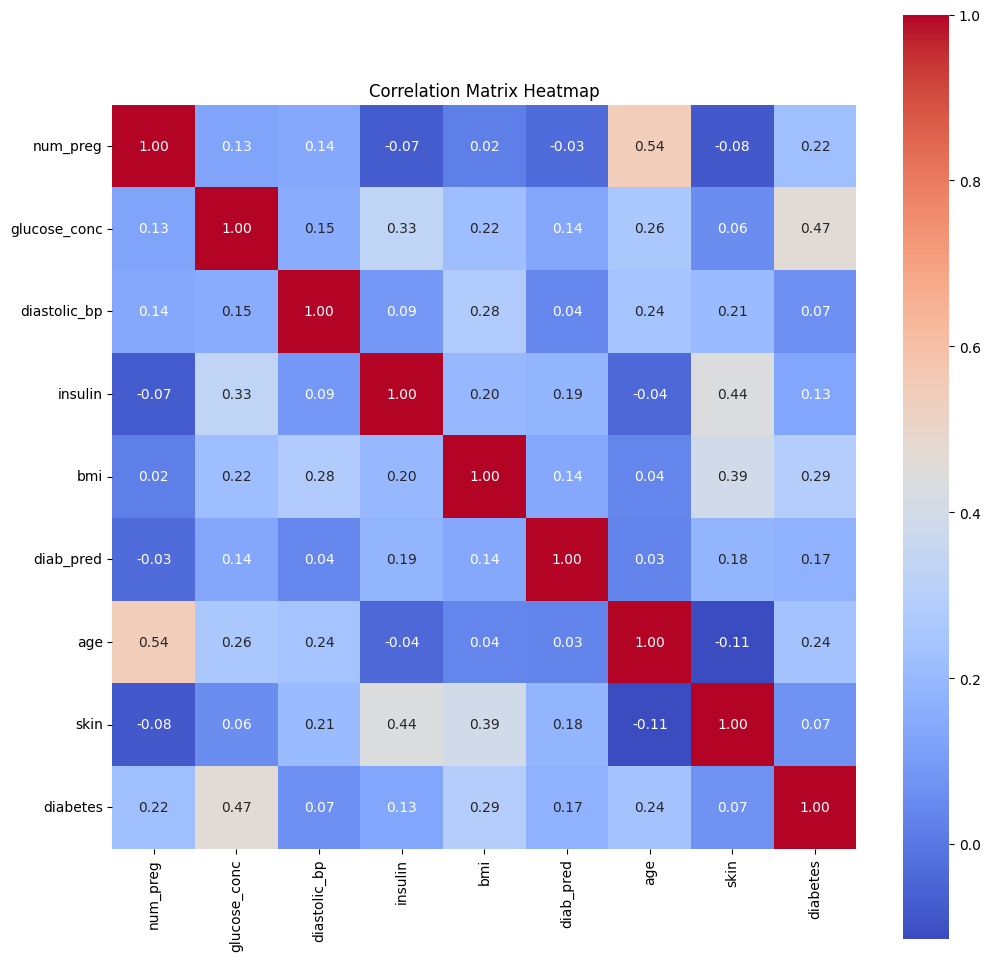

In [ ]:
import seaborn as sns

# Assuming 'corr1' is your correlation matrix (e.g., from df.corr())
plt.figure(figsize=(12, 12))  # Adjust the size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
def plot_corr(df,size=12):
    corr = df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    cmap='plasma'
    ax.matshow(corr,cmap=cmap)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=20)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

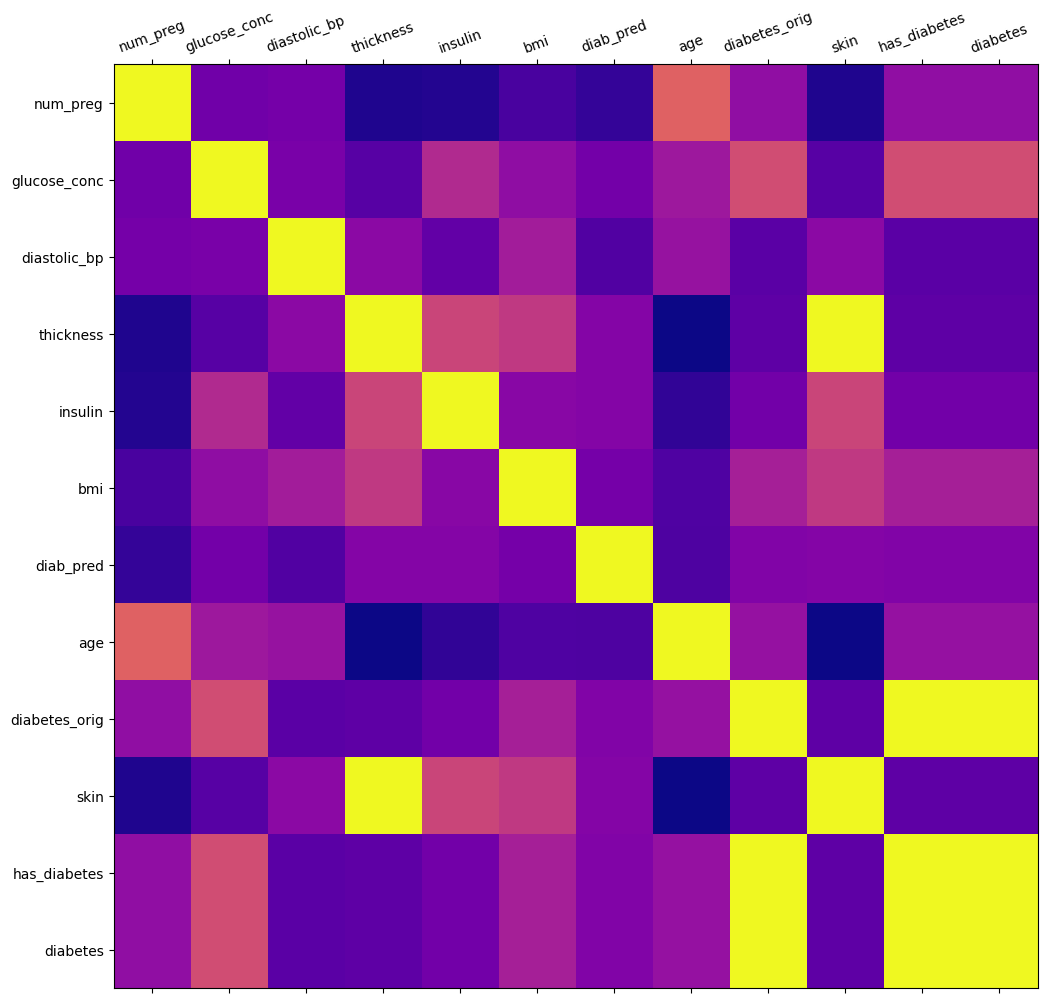

In [ ]:
plot_corr(df)

## corelated columns 
## thicknness and skin are corelated to each other
## diabetes_origin and has_diabetes are corelated to each other
## diabetes_origin and diabetes are corelated to each other
## has_diabtes and diabetes are corelated to each other

In [ ]:
# 3. drop the corelated columns
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True) 


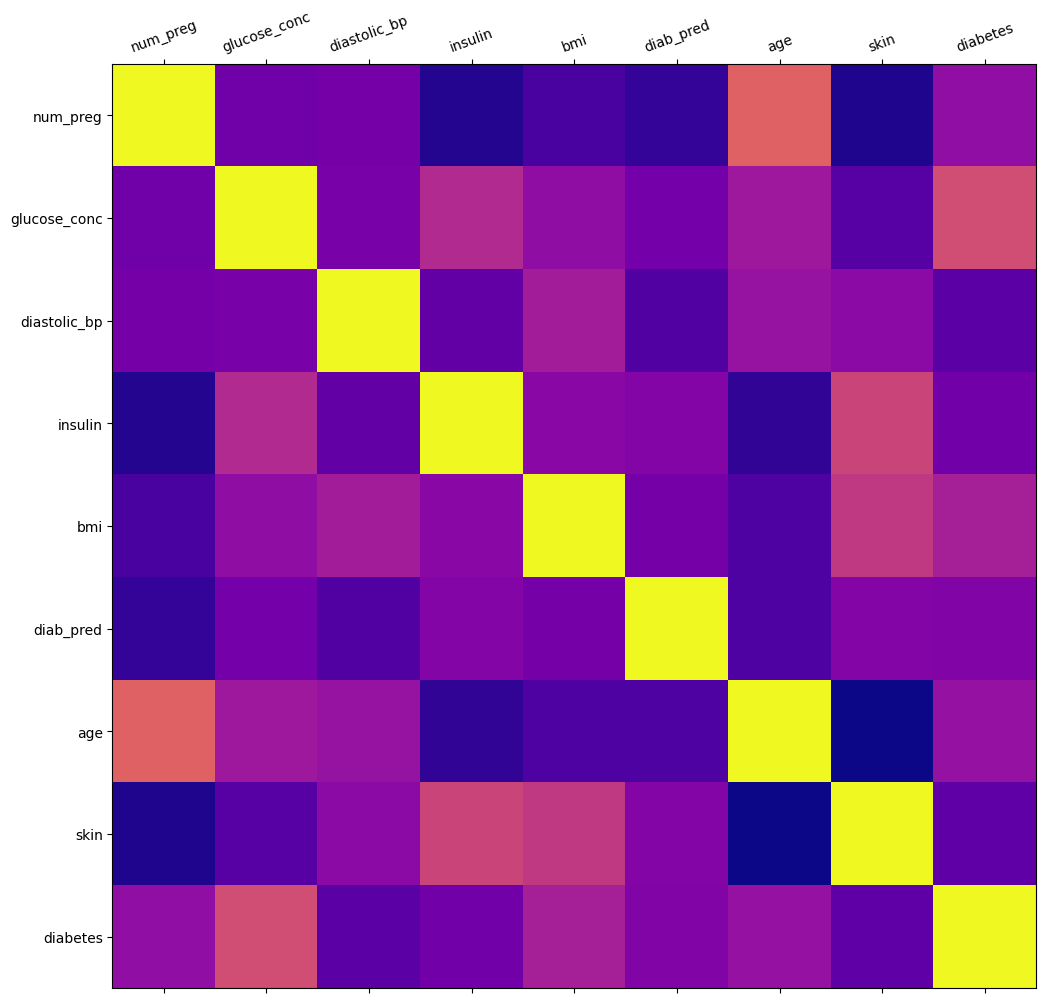

In [ ]:
plot_corr(df)

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


## convert text to integer

In [ ]:
# Creating a dictionary to convert True to 1 and False to 0
# Want to replace True and false in diabetes columns
dict1 = {
    'diabetes':[True,False]
    
}
# Inplace of True place with 1 and in place of False place with 0
dict2 = {
    'diabetes':[1,0]      
}


In [ ]:
df.replace(dict1,dict2,inplace=True)

C:\Users\Kalai\AppData\Local\Temp\ipykernel_21160\3065561261.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,inplace=True)


In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


# check the propertion

In [ ]:
num_true = len(df.loc[df['diabetes']==1])
num_false = len(df.loc[df['diabetes'] == 0])

print(f'num_true = {num_true}')
print(f'num_false = {num_false}')

per_num_true = (num_true / (num_true+num_false))*100
print(per_num_true)

per_num_false = (num_false/(num_false+num_true))*100
print(per_num_false)


num_true = 268
num_false = 500
34.89583333333333
65.10416666666666


# Train_Test_split

pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

input_columns = ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred','age','skin']
output_columns = ['diabetes']

x = df[input_columns].values
y = df[output_columns].values

spilt_test_size = 0.3

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = spilt_test_size,random_state=42)


X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = ['a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b']


Split the data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


print("Train:", X_train)
print("Test:", X_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(537, 8)
(537, 1)
(231, 8)
(231, 1)


In [ ]:
# check the training propertion and testng propertion
print('{0:0.2f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in training set'.format((len(x_test)/len(df.index))*100))


69.92% in training set
30.08% in training set


In [ ]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 1]),len(y_train[y_train[ : ] == 1])/len(y_train) * 100))


print('training False:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 0]),len(y_train[y_train[ : ] == 0])/len(y_train) * 100))
print('Test true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 1]),len(y_test[y_test[ : ] == 1])/len(y_train) * 100))
print('Test false:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 0]),len(y_test[y_test[ : ] == 0])/len(y_train) * 100))


training true:188 (35.01%)
training False:349 (64.99%)
Test true:80 (14.90%)
Test false:151 (28.12%)


# step4: post split preparation

In [ ]:
total_num_preg = len(df.loc[df['num_preg']== 0])
print(f'number of Rows missing in num_preg column is {total_num_preg}')

total_glucose_conc =  len(df.loc[df['glucose_conc']==0])
print(f'number of Rows missing in glucose_conc column is {total_glucose_conc}')

total_diastolic_bp = len(df.loc[df['diastolic_bp']==0])
print(f'number of Rows missing in diastolic_bp column is {total_diastolic_bp}')

total_insulin = len(df.loc[df['insulin']==0])
print(f'number of Rows missing in insulin column is {total_insulin}')

total_bmi = len(df.loc[df['bmi']==0])
print(f'number of Rows missing in bmi column is {total_bmi}')

total_diab_pred = len(df.loc[df['diab_pred']==0])
print(f'number of Rows missing in diab_pred column is {total_diab_pred}')

total_age = len(df.loc[df['age'] ==0])
print(f'number of rows missing in age is {total_age}')


number of Rows missing in num_preg column is 111
number of Rows missing in glucose_conc column is 5
number of Rows missing in diastolic_bp column is 35
number of Rows missing in insulin column is 374
number of Rows missing in bmi column is 11
number of Rows missing in diab_pred column is 0
number of rows missing in age is 0


In [ ]:
from sklearn.impute import SimpleImputer

fill_zeros = SimpleImputer(missing_values=0,strategy='mean')
x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)


# standardize the data

In [ ]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# step 5 Training the model
## train the model using naive bayees algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #creating object for GaussianNB Class
nb_model.fit(x_train,y_train.ravel()) # Training a model

GaussianNB()

In [ ]:
from sklearn import metrics
nb_predict_model = nb_model.predict(x_train)
print(f'Predicted accuracy {metrics.accuracy_score(y_train,nb_predict_model)}')

Predicted accuracy 0.7541899441340782


In [ ]:
nb_predict_test = nb_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,nb_predict_test)}')

Predicted accuracy 0.7359307359307359


In [ ]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,nb_predict_test)}")

confusion matrix
[[118  33]
 [ 28  52]]


In [ ]:
print("classification report")
print(metrics.classification_report(y_test,nb_predict_test))

classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# train your model using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # creating object for␣RandomForestClassifier class
rf_model.fit(x_train,y_train.ravel()) # Training a machine

RandomForestClassifier(random_state=42)

In [ ]:
rf_predict_model = rf_model.predict(x_train) # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_train,rf_predict_model)}') # Accuracy

Predicted accuracy 1.0


In [ ]:
rf_predict_test = rf_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,rf_predict_test) }')

Predicted accuracy 0.7532467532467533


In [ ]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,rf_predict_test)}")

confusion matrix
[[120  31]
 [ 26  54]]


In [ ]:
print("classification report")
print(metrics.classification_report(y_test,rf_predict_test))

classification report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train,y_train.ravel())

KNeighborsClassifier()

In [ ]:
kn_predict_model = k_neighbor.predict(x_train) # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_train,kn_predict_model)}')

Predicted accuracy 0.8379888268156425


In [ ]:
x_pred = k_neighbor.predict(x_test)
print(f'Accuracy = {metrics.accuracy_score(y_test,x_pred)}')

Accuracy = 0.7012987012987013


In [ ]:
print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,x_pred)}')

Confusion matrix = 
 [[113  38]
 [ 31  49]]


In [ ]:
print("classification report")
print(metrics.classification_report(y_test,x_pred))

classification report
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       151
           1       0.56      0.61      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231



## conclusion: by comparing all models,RF is giving good accuracy .so we prefer RF for my project

In [ ]:
#'num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred','age','skin'
#input_data=[413,145,82,110,22.2,0.245,57, 0.786]
input_data=[1,85,66,0,26.6,0.351,31,1.1426]
input_array = np.asarray(input_data).reshape(1, -1)
# Apply the same imputer and scaler to new data
input_array = fill_zeros.transform(input_array)
input_array = scaler.transform(input_array)
prediction = rf_model.predict(input_array)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")

Prediction: Not Diabetic


In [ ]:
import pickle
# Save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
# Save imputer
with open('imputer.pkl', 'wb') as f:
    pickle.dump(fill_zeros, f)